## XG Boost Regression Model
### 1. Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay


### 2. Load and Preprocess the Dataset

In [2]:
# Load dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target

# Splitting features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Split dataset into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


### 3. Train XGBoost Model

In [6]:
# Define and train the XGBoost regressor
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### 4. Model Evaluation Metrics

In [7]:
# Predictions
y_pred = xgb_reg.predict(X_test_scaled)

# Compute Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.3155
Mean Squared Error (MSE): 0.2273
Root Mean Squared Error (RMSE): 0.4767
Mean Absolute Percentage Error (MAPE): 18.25%
R² Score: 0.8266


### 5. Feature Importance Analysis

<Figure size 1000x600 with 0 Axes>

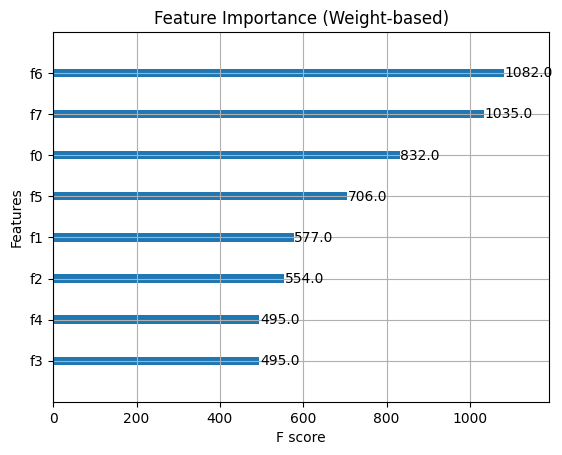

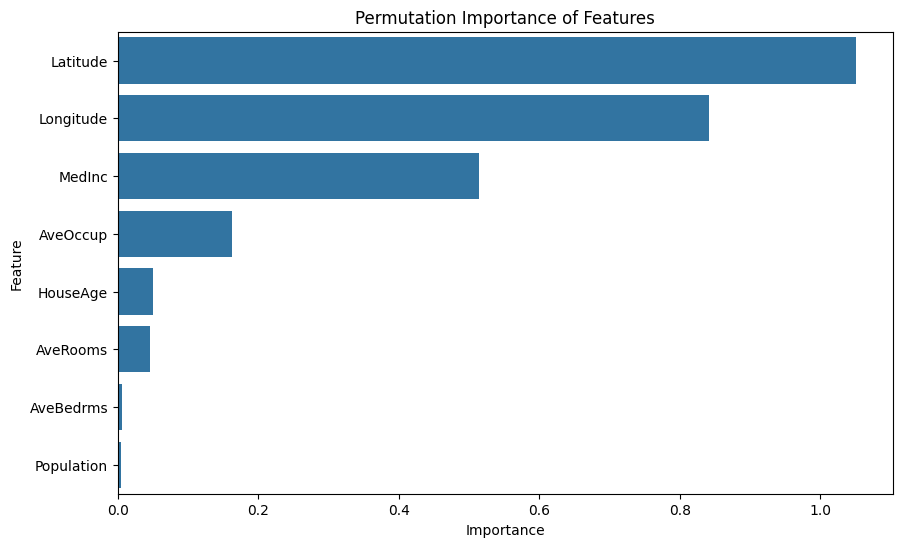

In [8]:
# Plot Feature Importance from XGBoost
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_reg, importance_type="weight")
plt.title("Feature Importance (Weight-based)")
plt.show()

# Compute Permutation Importance
perm_importance = permutation_importance(xgb_reg, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Convert to DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot Permutation Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Permutation Importance of Features")
plt.show()


In [12]:
# Standardize features and retain column names
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### 6. Partial Dependence Plot (PDP) Analysis

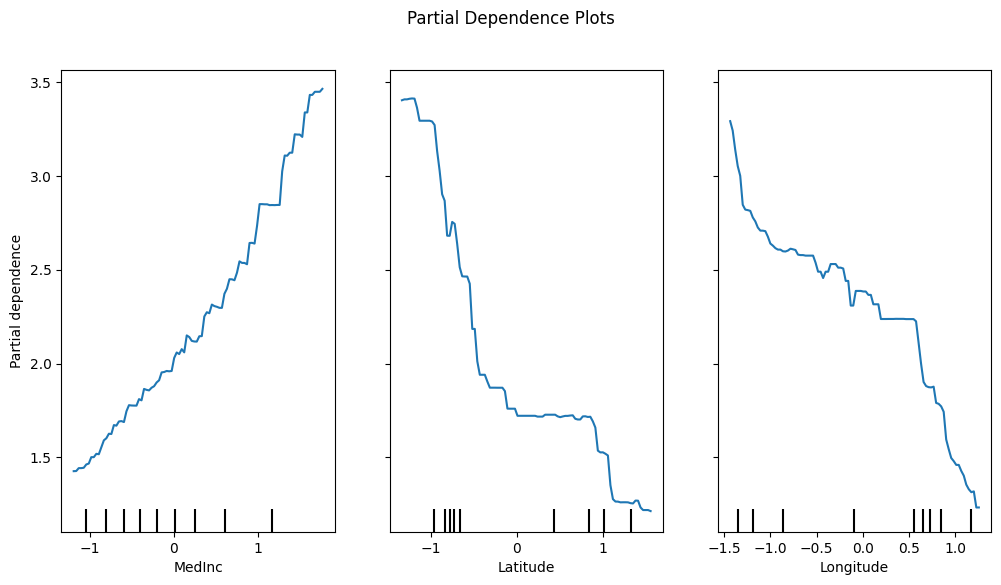

In [13]:
# Generate Partial Dependence Plots for selected features
features_to_plot = ["MedInc", "Latitude", "Longitude"]
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(xgb_reg, X_test_scaled, features_to_plot, ax=ax)
plt.suptitle("Partial Dependence Plots")
plt.show()